# Descriptives (using the csv file)

In [1]:
import json
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Maren´s part

In [2]:
#get the csv

In [3]:
df_clean_data = pd.read_csv(r'C:\Users\Maren\Desktop\TechLabs\hh_techlabs_group12\hh_techlabs_group12\clean_data_2021-08-14.csv')

In [4]:
df_clean_data

,@iot.id,phenomenonDate,result,id,lat,long,weekday
0,217458399,2021-08-12,1090,15808,53.650597,9.949614,Thursday
1,216650904,2021-08-11,1040,15808,53.650597,9.949614,Wednesday
2,219332283,2021-08-13,1013,15808,53.650597,9.949614,Friday
3,51222146,2021-01-22,7831,14812,53.628402,10.140319,Friday
4,51496408,2021-01-23,5187,14812,53.628402,10.140319,Saturday
...,...,...,...,...,...,...,...
120804,207523877,2021-07-31,4156,14412,53.530336,10.065717,Saturday
120805,208617775,2021-08-01,2851,14412,53.530336,10.065717,Sunday
120806,210239080,2021-08-02,4901,14412,53.530336,10.065717,Monday
120807,211949905,2021-08-03,4572,14412,53.530336,10.065717,Tuesday


In [5]:
df_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120809 entries, 0 to 120808
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   @iot.id         120809 non-null  int64  
 1   phenomenonDate  120809 non-null  object 
 2   result          120809 non-null  int64  
 3   id              120809 non-null  int64  
 4   lat             120809 non-null  float64
 5   long            120809 non-null  float64
 6   weekday         120809 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 6.5+ MB


In [18]:
df_clean_data.dtypes

@iot.id                    int64
phenomenonDate    datetime64[ns]
result                     int64
id                         int64
lat                      float64
long                     float64
weekday                   object
dtype: object

In [7]:
#  I would like to change phenomenonDate back to the format datetime64 (this got lost when saving the file as csv)

In [17]:
df_clean_data=df_clean_data.astype({'phenomenonDate': 'datetime64'})

In [ ]:
df_clean_data.dtypes

In [10]:
#min/max values

df_clean_data.max()

@iot.id            219332820
phenomenonDate    2021-08-13
result                103236
id                     15892
lat                  53.6808
long                 10.2165
weekday            Wednesday
dtype: object

In [11]:
df_clean_data.min()

@iot.id             51216915
phenomenonDate    2020-11-01
result                     0
id                     12904
lat                  53.4196
long                 9.73555
weekday               Friday
dtype: object

In [19]:
df_clean_data.loc[df_clean_data["result"]==0]

,@iot.id,phenomenonDate,result,id,lat,long,weekday
35505,57532591,2021-02-21,0,14648,53.583577,9.984033,Sunday
35511,58820174,2021-02-27,0,14648,53.583577,9.984033,Saturday
35513,59230729,2021-03-01,0,14648,53.583577,9.984033,Monday
51192,51839773,2020-12-01,0,14836,53.598878,9.991415,Tuesday
51194,51840064,2020-11-01,0,14836,53.598878,9.991415,Sunday
...,...,...,...,...,...,...,...
117625,67002239,2021-04-05,0,14856,53.557454,10.033140,Monday
117626,65377816,2021-03-28,0,14856,53.557454,10.033140,Sunday
117631,68002083,2021-04-09,0,14856,53.557454,10.033140,Friday
117632,68123034,2021-04-10,0,14856,53.557454,10.033140,Saturday


In [12]:
### --> range of dates: From 2020-11-01 to 2021-08-13 the vehicles are counted

In [13]:
# How many Zählstellen are measuring every day? 

## pivot: count numbers of Zählstellen("id") per phenomenondate
CountZaehlstelle = df_clean_data.pivot_table(values = "id", index = "phenomenonDate", aggfunc= "count")
CountZaehlstelle

,id
phenomenonDate,
2020-11-01,417
2020-11-02,417
2020-11-03,418
2020-11-04,418
2020-11-05,424
...,...
2021-08-09,372
2021-08-10,382
2021-08-11,411


<AxesSubplot:xlabel='phenomenonDate', ylabel='id'>

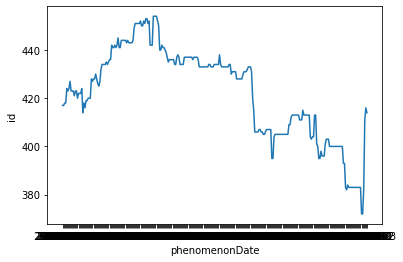

In [14]:
sns.lineplot(data=CountZaehlstelle, x = "phenomenonDate", y = "id")

In [15]:
# Combined number of cars measured each individual day
SumCars = df_clean_data.pivot_table(values = "result", index = "phenomenonDate", aggfunc = "sum")
SumCars

,result
phenomenonDate,
2020-11-01,3103401
2020-11-02,5224876
2020-11-03,5351141
2020-11-04,5298766
2020-11-05,5332135
...,...
2021-08-09,5162366
2021-08-10,5337259
2021-08-11,6138216


In [16]:
#sns.barplot(x="phenomenonDate", y="result", data=SumCars)

### Doesn´t work! @Patricia, könntest du mal schauen, ob du das rausfindest? Ich hätte einfach gern das PhenomenonDate
# in der X-Achse und die Summen aus "SumCars" jeweils als Balken obendrüber :) LG, Maren

ValueError: Could not interpret input 'phenomenonDate'

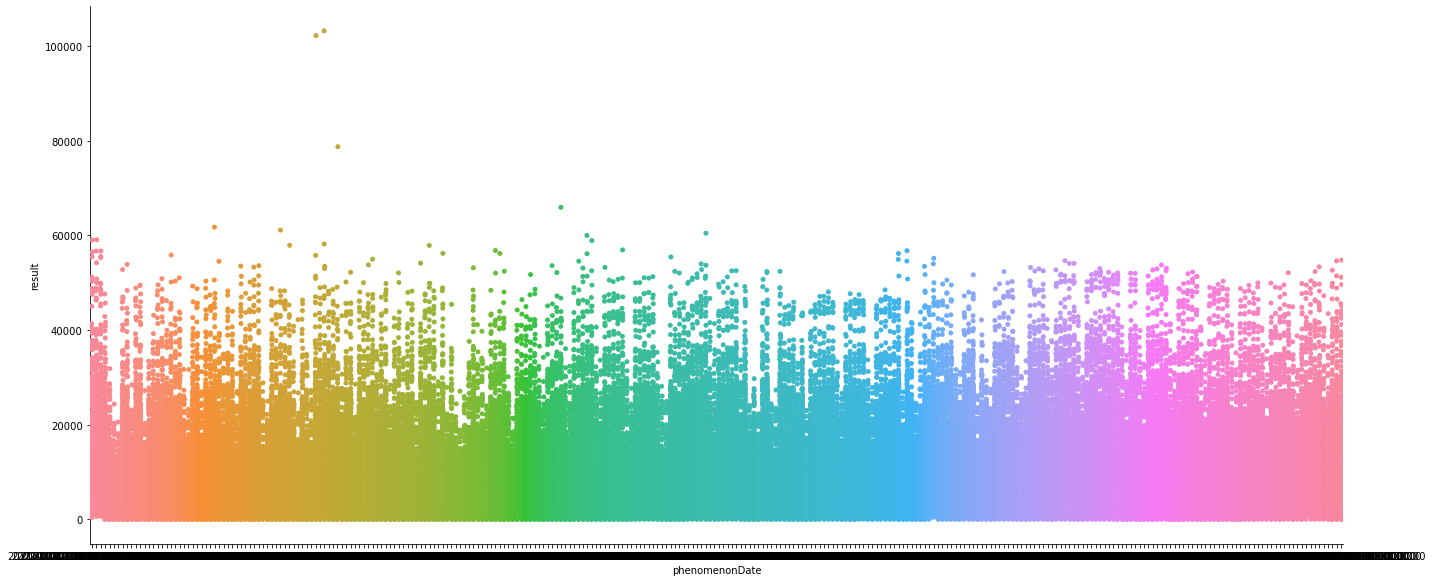

In [20]:
# How much traffic is there all combined every day?
sns.catplot(x="phenomenonDate", y="result", data = df_clean_data, height=8, aspect=2.5)

# Patricia´s part:

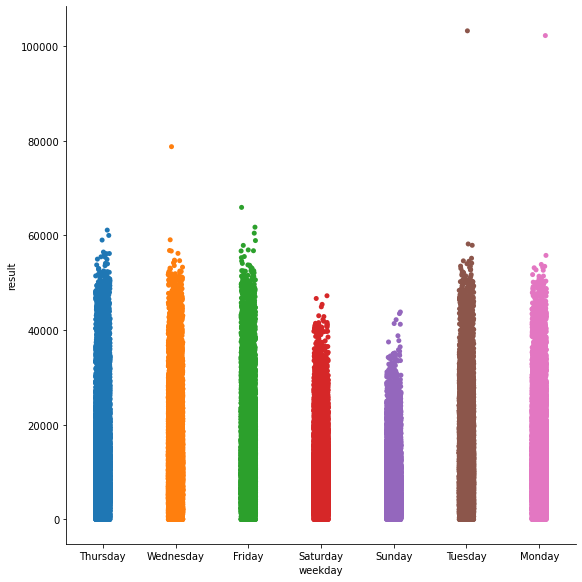

In [21]:
# Amount of cars per weekday
sns.catplot(x="weekday", y="result", data = df_clean_data, height=8)

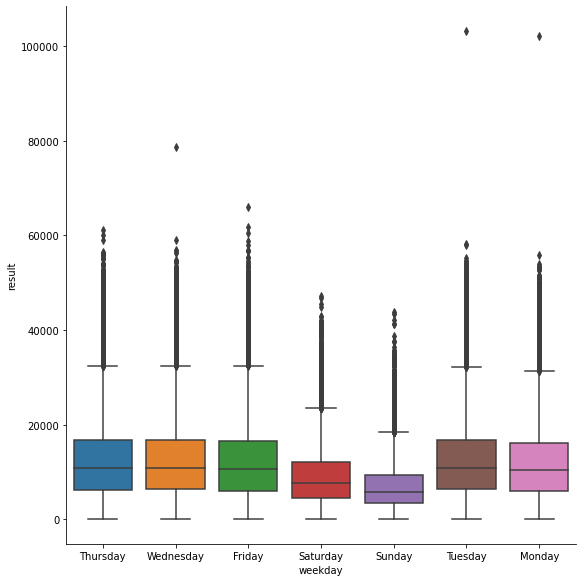

In [22]:
# Another way for visualiszation is using a boxplot. 
sns.catplot(x="weekday", y="result", kind="box", data=df_clean_data, height = 8)

In [23]:
# Calculating the average of each weekday
df_clean_data.groupby(['weekday']).mean()



,@iot.id,result,id,lat,long
weekday,,,,,
Friday,9.283046e+07,12666.090888,13886.317589,53.573169,10.007675
Monday,9.009124e+07,12349.687753,13882.058980,53.573188,10.007671
Saturday,9.013254e+07,9274.666410,13882.389306,53.573138,10.007724
Sunday,8.959840e+07,7132.234545,13881.767770,53.573136,10.007703
Thursday,9.210643e+07,12765.476050,13886.519569,53.573187,10.007512
Tuesday,9.064623e+07,12862.126155,13882.331640,53.573141,10.007551
Wednesday,9.145576e+07,12919.602767,13886.050389,53.573200,10.007595
